# Python Problem
> Casandra Westh Maier

> 20 December 2023

## 1.  Find the dataset “Volatile FiehnLib” and download as json file

In [41]:
# import JavaScript Object Notation package
import json

path = 'MoNA-export-Volatile_FiehnLib_1.json'

with open(path, 'r') as file:
    data = json.load(file)

## 2.  Name the different column names and data types associated

In [44]:
# Test to analyze column names and types
first_obj = data[0] if data else {}
    
# Create dictionary of the column names, with data type
column_dtype = {key: type(value).__name__ for key, value in first_obj.items()}
print("FORMAT\n column name: dtype")
column_dtype

FORMAT
 column name: dtype


{'compound': 'list',
 'id': 'str',
 'metaData': 'list',
 'annotations': 'list',
 'score': 'dict',
 'spectrum': 'str',
 'lastUpdated': 'int',
 'dateCreated': 'int',
 'lastCurated': 'int',
 'splash': 'dict',
 'submitter': 'dict',
 'tags': 'list',
 'library': 'dict'}

## 3. Extract score valueS from the score column

In [46]:
# Parse score values from the 'score' column (dictionary)
score_values = [item['score'] for item in data if 'score' in item]

# Display score entries
score_values

[{'impacts': [{'value': 2.0,
    'reason': 'Valid molecular structure(s) provided for biological compound'},
   {'value': 1.0, 'reason': 'Chromatography identified as GC-MS'},
   {'value': 1.0, 'reason': 'Ionization mode/type provided'},
   {'value': 1.0, 'reason': 'MS type/level identified'},
   {'value': 1.0, 'reason': 'Instrument information provided'},
   {'value': 1.0, 'reason': 'Collision energy provided'},
   {'value': -1.0, 'reason': 'No retention time/index provided'}],
  'score': 4.375,
  'relativeScore': 0.0,
  'scaledScore': 0.0},
 {'impacts': [{'value': 2.0,
    'reason': 'Valid molecular structure(s) provided for biological compound'},
   {'value': 1.0, 'reason': 'Chromatography identified as GC-MS'},
   {'value': 1.0, 'reason': 'Ionization mode/type provided'},
   {'value': 1.0, 'reason': 'MS type/level identified'},
   {'value': 1.0, 'reason': 'Instrument information provided'},
   {'value': 1.0, 'reason': 'Collision energy provided'},
   {'value': -1.0, 'reason': 'No r

## 4. Convert Datecreated timestamp from UTC to localtime

In [47]:
# Import packages datetime (for UTC)
# pytz for accurate time
from datetime import datetime, timezone, timedelta
import pytz

# Users local timezone
user_timezone = pytz.timezone('America/New_York')

# UTC converstion 
for item in data:
    if 'dateCreated' in item:
        # timestamp milliseconds to seconds
        timestamp_seconds = item['dateCreated'] / 1000
        # Conversion timestamp datetime object in UTC
        utc = datetime.fromtimestamp(timestamp_seconds, timezone.utc)
        # Convert UTC to local time
        local_time = utc.astimezone(user_timezone)
        # Add local time to new 'localtime' key
        item['localtime'] = local_time
        
# OPTIONAL VISUAL
preview_data = [{'dateCreated': item['dateCreated'], 'localtime': item['localtime']} for item in data[:5]]
preview_data

[{'dateCreated': 1590105600000,
  'localtime': datetime.datetime(2020, 5, 21, 20, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)},
 {'dateCreated': 1590105600000,
  'localtime': datetime.datetime(2020, 5, 21, 20, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)},
 {'dateCreated': 1590105600000,
  'localtime': datetime.datetime(2020, 5, 21, 20, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)},
 {'dateCreated': 1590105600000,
  'localtime': datetime.datetime(2020, 5, 21, 20, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)},
 {'dateCreated': 1590105600000,
  'localtime': datetime.datetime(2020, 5, 21, 20, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)}]

## 5. Plost score vs localtime

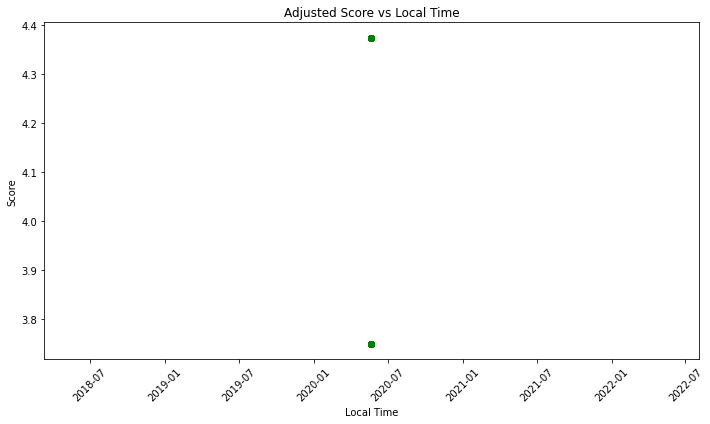

In [36]:
# plot package
import matplotlib.pyplot as plt

# Extract data from the 'score' within score dictionary
adjusted_scores = [item['score']['score'] for item in data if 'score' in item and 'score' in item['score']]
adjusted_localtimes = [item['localtime'] for item in data if 'localtime' in item and 'score' in item and 'score' in item['score']] 


# Plot 'adjusted_scores vs localtime'
plt.figure(figsize=(10, 6))
plt.scatter(adjusted_localtimes, adjusted_scores, alpha=0.7, color='green')
plt.xlabel('Local Time')
plt.ylabel('Score')
plt.title('Adjusted Score vs Local Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. Maximum score

In [48]:
# Max score
max_score = max(adjusted_scores)
print("Maximum Score Value: ", max_score)

Maximum Score Value:  4.375


## 7. Load csv file and plot

In [50]:
# Load mass spectrum CSV

spectrum_test = pd.read_csv('Spectrum UO000022_Test.csv')

# OPTIONAL Test dataframe 
spectrum_test.head()

,ion,Intensity
0,27,18.854375
1,28,1.987500
2,29,24.110000
3,30,3.698750
4,38,2.191250


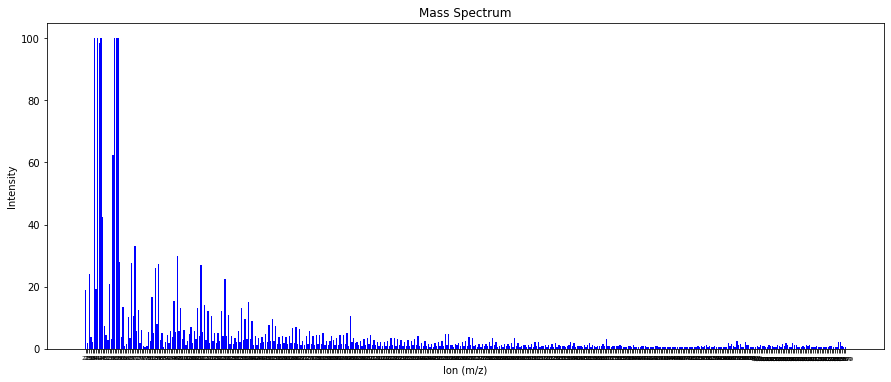

In [54]:
# Plot mass spectrum 

plt.figure(figsize=(12, 6))
plt.bar(spectrum_test['ion'], spectrum_test['Intensity'], color='blue')
plt.xlabel('Ion (m/z)')
plt.ylabel('Intensity')
plt.title('Mass Spectrum')
plt.xticks(fontsize=8)
plt.show()  

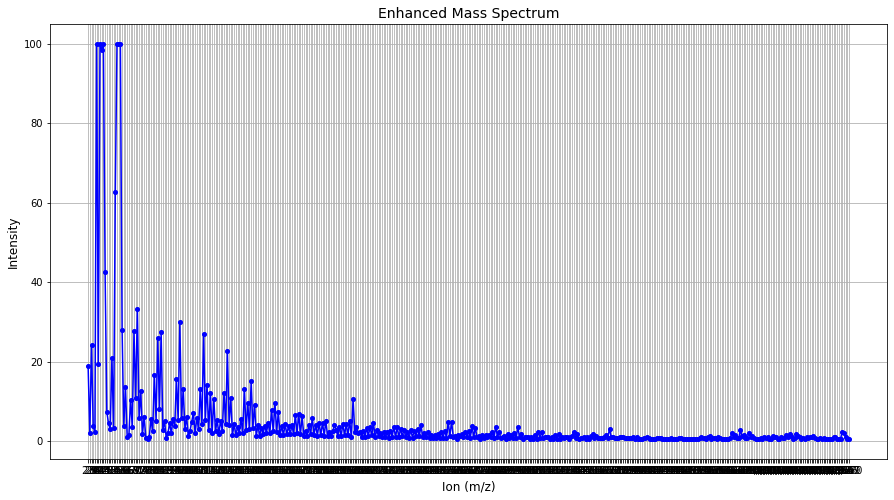

In [60]:
# Improved/enhanced plot for readability
plt.figure(figsize=(15, 8))
plt.plot(spectrum_test['ion'], spectrum_test['Intensity'], color='blue', marker='o', linestyle='-', markersize=4)
plt.xlabel('Ion (m/z)', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.title('Enhanced Mass Spectrum', fontsize=14)
plt.grid(True)
plt.show()

## 8. Computer max, min and sd

In [70]:
# Using Pandas

# FORMAT: max, min, std

max_intensity_pandas = spectrum_test['Intensity'].max()
min_intensity_pandas = spectrum_test['Intensity'].min()
std_intensity_pandas = spectrum_test['Intensity'].std()

print("Using Pandas\nMAX:", max_intensity_pandas, "\nMIN:", min_intensity_pandas, "\nSTD:" ,std_intensity_pandas)

Using Pandas
MAX: 100.0 
MIN: 0.5025 
STD: 13.277495954370977


In [69]:
# Using numpy
import numpy as np
max_intensity_numpy = np.max(spectrum_test['Intensity'])
min_intensity_numpy = np.min(spectrum_test['Intensity'])
std_intensity_numpy = np.std(spectrum_test['Intensity'])

print("Using numpy\nMAX:", max_intensity_numpy, "\nMIN:", min_intensity_numpy, "\nSTD:",std_intensity_numpy )

Using numpy
MAX: 100.0 
MIN: 0.5025 
STD: 13.262702082418302
